C:\Users\SHREY\AppData\Local\Temp\ipykernel_19692\4210439618.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d

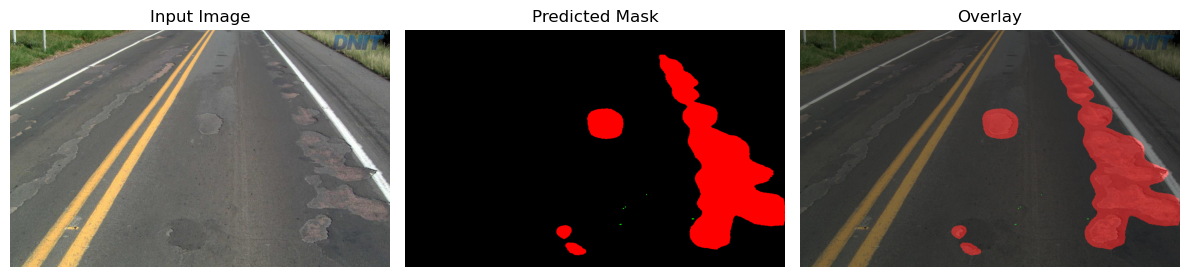

In [3]:
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import segmentation_models_pytorch as smp

# ---------- CONFIG ----------
model_path = r"C:\Users\SHREY\Desktop\gnctd\models_train2\model_epoch_30.pth"
image_path = r"C:\Users\SHREY\Desktop\gnctd\segmentation_dataset\test\images\883254_RS_290_290RS150131_17000.jpg"
num_classes = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------- MODEL ----------
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights=None,      # Set to None since we’re loading trained weights
    in_channels=3,
    classes=num_classes
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ---------- PREPROCESS ----------
# Resize image to 1024x640 like in training and center pad if height < 640
target_w, target_h = 1024, 640
image = Image.open(image_path).convert('RGB')
w, h = image.size

# Resize width if not 1024
if w != target_w:
    image = image.resize((target_w, int(h * (target_w / w))), Image.BILINEAR)

# Now check height padding
w, h = image.size
if h < target_h:
    pad_h = target_h - h
    pad_top = pad_h // 2
    pad_bottom = pad_h - pad_top
    image = transforms.functional.pad(image, (0, pad_top, 0, pad_bottom), fill=0)

# Convert to tensor
input_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)  # [1, 3, H, W]

# ---------- INFERENCE ----------
with torch.no_grad():
    output = model(input_tensor)  # [1, C, H, W]
    pred_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy()  # [H, W]

# ---------- DECODE MASK ----------
def decode_segmap(mask, num_classes=3):
    colormap = {
        0: [0, 0, 0],        # Background
        1: [0, 255, 0],      # Crack
        2: [255, 0, 0],      # Pothole
    }
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in colormap.items():
        color_mask[mask == cls_id] = color
    return color_mask

decoded_mask = decode_segmap(pred_mask)

# Resize input image to match predicted mask if needed
image = image.resize((decoded_mask.shape[1], decoded_mask.shape[0]))

# ---------- VISUALIZATION ----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(decoded_mask)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image)
plt.imshow(decoded_mask, alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()

C:\Users\SHREY\AppData\Local\Temp\ipykernel_1112\2532133545.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=de

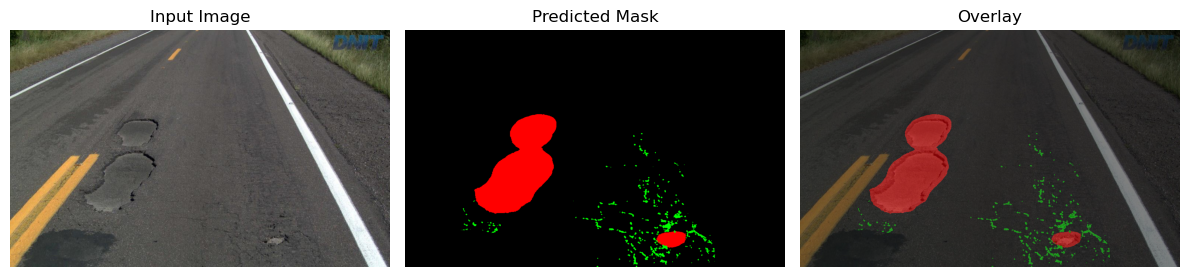

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import segmentation_models_pytorch as smp

# ---------- CONFIG ----------
model_path = r"C:\Users\SHREY\Desktop\gnctd\unet_resnet34_segmentation.pth"
image_path = r"C:\Users\SHREY\Desktop\gnctd\segmentation_dataset\test\images\917672_RS_290_290RS294095_21811.jpg"
num_classes = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------- MODEL ----------
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights=None,      # Set to None since we’re loading trained weights
    in_channels=3,
    classes=num_classes
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ---------- PREPROCESS ----------
# Resize image to 1024x640 like in training and center pad if height < 640
target_w, target_h = 1024, 640
image = Image.open(image_path).convert('RGB')
w, h = image.size

# Resize width if not 1024
if w != target_w:
    image = image.resize((target_w, int(h * (target_w / w))), Image.BILINEAR)

# Now check height padding
w, h = image.size
if h < target_h:
    pad_h = target_h - h
    pad_top = pad_h // 2
    pad_bottom = pad_h - pad_top
    image = transforms.functional.pad(image, (0, pad_top, 0, pad_bottom), fill=0)

# Convert to tensor
input_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)  # [1, 3, H, W]

# ---------- INFERENCE ----------
with torch.no_grad():
    output = model(input_tensor)  # [1, C, H, W]
    pred_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy()  # [H, W]

# ---------- DECODE MASK ----------
def decode_segmap(mask, num_classes=3):
    colormap = {
        0: [0, 0, 0],        # Background
        1: [0, 255, 0],      # Crack
        2: [255, 0, 0],      # Pothole
    }
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in colormap.items():
        color_mask[mask == cls_id] = color
    return color_mask

decoded_mask = decode_segmap(pred_mask)

# Resize input image to match predicted mask if needed
image = image.resize((decoded_mask.shape[1], decoded_mask.shape[0]))

# ---------- VISUALIZATION ----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(decoded_mask)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image)
plt.imshow(decoded_mask, alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()

C:\Users\SHREY\AppData\Local\Temp\ipykernel_1112\2222867942.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=de

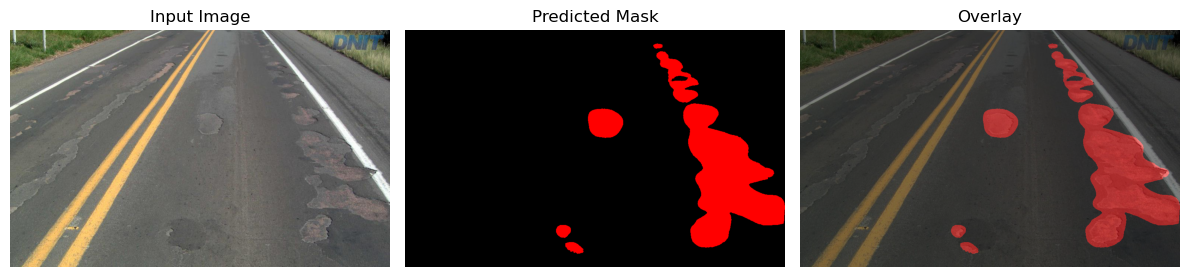

In [4]:
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import segmentation_models_pytorch as smp

# ---------- CONFIG ----------
model_path = r"C:\Users\SHREY\Desktop\gnctd\unet_resnet34_segmentation.pth"
image_path = r"C:\Users\SHREY\Desktop\gnctd\segmentation_dataset\test\images\883254_RS_290_290RS150131_17000.jpg"
num_classes = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------- MODEL ----------
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights=None,      # Set to None since we’re loading trained weights
    in_channels=3,
    classes=num_classes
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ---------- PREPROCESS ----------
# Resize image to 1024x640 like in training and center pad if height < 640
target_w, target_h = 1024, 640
image = Image.open(image_path).convert('RGB')
w, h = image.size

# Resize width if not 1024
if w != target_w:
    image = image.resize((target_w, int(h * (target_w / w))), Image.BILINEAR)

# Now check height padding
w, h = image.size
if h < target_h:
    pad_h = target_h - h
    pad_top = pad_h // 2
    pad_bottom = pad_h - pad_top
    image = transforms.functional.pad(image, (0, pad_top, 0, pad_bottom), fill=0)

# Convert to tensor
input_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)  # [1, 3, H, W]

# ---------- INFERENCE ----------
with torch.no_grad():
    output = model(input_tensor)  # [1, C, H, W]
    pred_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy()  # [H, W]

# ---------- DECODE MASK ----------
def decode_segmap(mask, num_classes=3):
    colormap = {
        0: [0, 0, 0],        # Background
        1: [0, 255, 0],      # Crack
        2: [255, 0, 0],      # Pothole
    }
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in colormap.items():
        color_mask[mask == cls_id] = color
    return color_mask

decoded_mask = decode_segmap(pred_mask)

# Resize input image to match predicted mask if needed
image = image.resize((decoded_mask.shape[1], decoded_mask.shape[0]))

# ---------- VISUALIZATION ----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(decoded_mask)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image)
plt.imshow(decoded_mask, alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([3]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([3, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\SHREY\AppData\Local\Temp\ipykernel_1112\1833912931.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). I

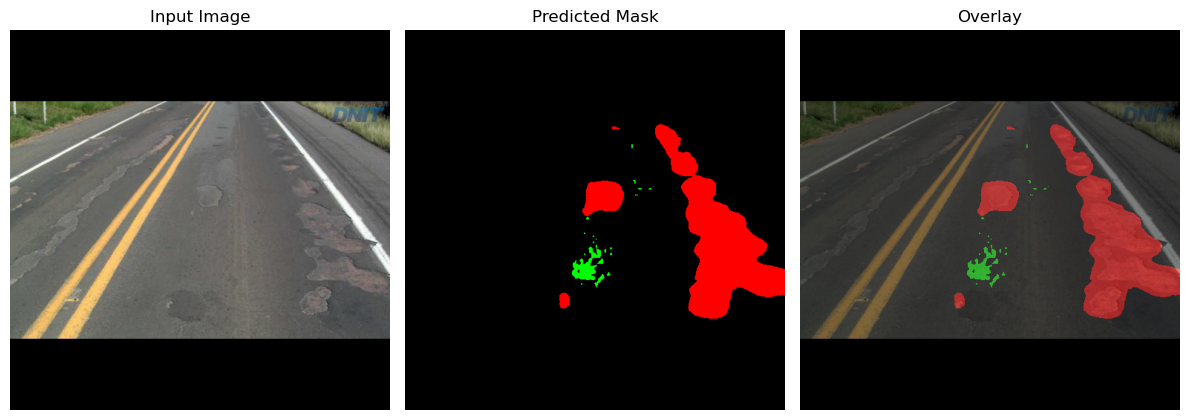

In [5]:
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------- CONFIG ----------
model_path = r"C:\Users\SHREY\Desktop\gnctd\segformer_last.pth"
image_path = r"C:\Users\SHREY\Desktop\gnctd\segmentation_dataset_512_512\test\images\883254_RS_290_290RS150131_17000.jpg"
num_classes = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------- MODEL ----------
model = SegformerForSemanticSegmentation.from_pretrained(
    "nvidia/segformer-b0-finetuned-ade-512-512",
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# ---------- PROCESSOR ----------
processor = SegformerImageProcessor(do_reduce_labels=False, do_resize=True, size=(512, 512), do_normalize=True)

# ---------- IMAGE PREP ----------
image = Image.open(image_path).convert("RGB")
inputs = processor(images=image, return_tensors="pt").to(device)

# ---------- INFERENCE ----------
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits  # [1, num_classes, H, W]
    upsampled_logits = torch.nn.functional.interpolate(logits, size=image.size[::-1], mode="bilinear", align_corners=False)
    predicted = torch.argmax(upsampled_logits, dim=1)[0].cpu().numpy()

# ---------- COLOR MAP ----------
def decode_segmap(mask, num_classes=3):
    colormap = {
        0: [0, 0, 0],        # Background
        1: [0, 255, 0],      # Crack
        2: [255, 0, 0],      # Pothole
    }
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in colormap.items():
        color_mask[mask == cls_id] = color
    return color_mask

decoded_mask = decode_segmap(predicted)

# ---------- VISUALIZATION ----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(decoded_mask)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image)
plt.imshow(decoded_mask, alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()